
# Assignment: Linear Regression, Logistic Regression, and K-Means (From Scratch)

**Instructions**
- You are NOT allowed to use `scikit-learn` for model implementation, scaling.
- You may use it for implementation of clustering
- You may use: `numpy`, `matplotlib`, and standard Python libraries only.
- Every step (scaling, loss, gradients, optimization) must be implemented manually.
- Clearly comment your code and explain your reasoning in Markdown cells.


## Question 1: Linear Regression from Scratch (with Standardization and Regularization)

You are given a dataset `(X, y)`.

### Tasks
1. Implement **StandardScaler manually**:
   - Compute mean and standard deviation for each feature.
   - Standardize the features.
2. Implement **Linear Regression using Gradient Descent**.
3. Add **L2 Regularization (Ridge Regression)**.
4. Plot:
   - Loss vs iterations
   - True vs predicted values

Do NOT use `sklearn`.


In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Implement StandardScaler manually ,  first read about it, how it works and then implement it
class StandardScalerManual:
    def fit(self, X):
        """
        Compute mean and standard deviation for each feature.
        X : numpy array of shape (n_samples, n_features)
        """
        #Mean of each feature(column wise)
        self.mean = np.mean(X, axis=0)

        #Standard deviation of each feature.
        self.std = np.std(X, axis=0)

        return self

    def transform(self, X):
        """
        Standardize the dataset using the stored mean and standard deviation.
        """
        #To avoid division by zero.

        return (X - self.mean) / (self.std + 1e-8)

    def fit_transform(self, X):
        """
        Fit the scaler to the data and transform it.
        """
        self.fit(X)
        return self.transform(X)

In [3]:
# Implement Linear Regression from scratch, here you have to also construct the regulization term coefficient of which will be
# denoted by l2_lambda
# try to implement L1 regularization or atlease read about it and where it is used
class LinearRegressionManual:
    def __init__(self, lr=0.01, epochs=1000, l2_lambda=0.0):
        self.lr = lr
        self.epochs = epochs
        self.l2_lambda = l2_lambda
        self.weights = None
        self.bias = 0
        self.losses = []

    def fit(self, X, y):
        n_samples, n_features = X.shape
        #Initialise weights
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.epochs):
            #Prediction
            y_pred = np.dot(X, self.weights) + self.bias

            #Compute loss (MSE + L2)
            #We use an unnormalized L2 penalty for simplicity.
            mse_loss = np.mean((y_pred - y) ** 2)
            l2_loss = self.l2_lambda * np.dot(self.weights, self.weights)
            total_loss = mse_loss + l2_loss
            self.losses.append(total_loss)

            #Gradients
            dw = (-2 / n_samples) * np.dot(X.T, (y - y_pred)) + 2 * self.l2_lambda * self.weights
            db = (-2 / n_samples) * np.sum(y - y_pred)

            #Update Parameters
            self.weights -= self.lr * dw
            self.bias -= self.lr * db

    def predict(self, X):
        return np.dot(X, self.weights) + self.bias

In [4]:
# Creating a simple synthetic dataset
np.random.seed(42)

n_samples = 100
X = 2 * np.random.rand(n_samples, 1)
y = 4 * X.flatten() + 3 + np.random.randn(n_samples)

In [5]:
scaler = StandardScalerManual()
X_scaled = scaler.fit_transform(X)

model = LinearRegressionManual(lr=0.01, epochs=1000, l2_lambda=0.1)
model.fit(X_scaled, y)

y_pred = model.predict(X_scaled)

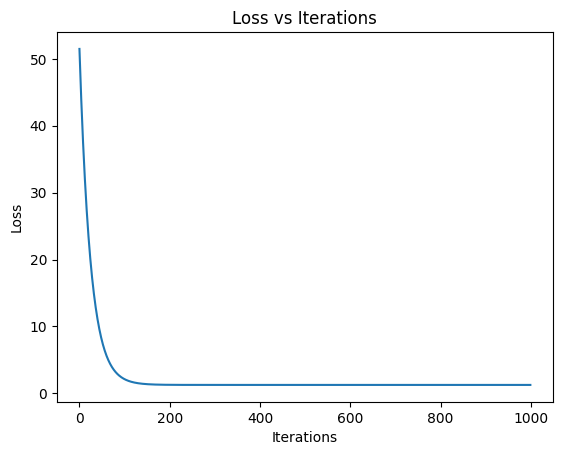

In [6]:
plt.figure()
plt.plot(model.losses)
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.title("Loss vs Iterations")
plt.show()

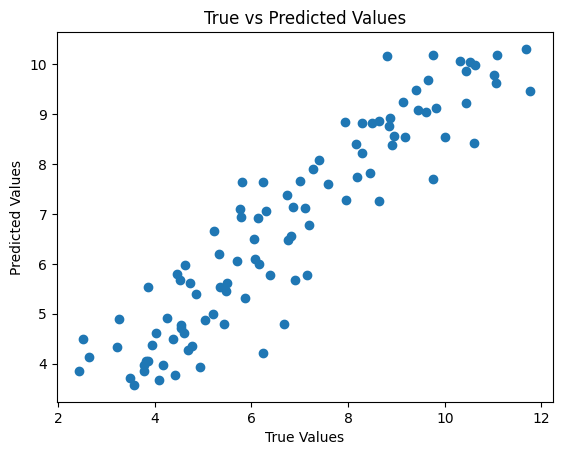

In [7]:
plt.figure()
plt.scatter(y, y_pred)
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.title("True vs Predicted Values")
plt.show()

Summary: To improve convergence stability and speed, we standardize the features so that each feature contributes equally during gradient descent. Gradient descent is used to optimize linear regression, and the loss function is Mean Squared Error (MSE). To penalize large feature weights and lessen overfitting, L2 regularization (Ridge Regression) is added; since regularization is only meant for feature weights, the bias term is not regularized. Smoother models with smaller weights are produced by increasing the regularization strength (λ), but underfitting may result from very high values of λ. Over iterations, the loss curve steadily decreases, demonstrating the model's successful convergence.


## Question 2: Logistic Regression from Scratch (with Standardization and Regularization)

You are given a binary classification dataset.

### Tasks
1. Reuse your **manual StandardScaler**.
2. Implement **Logistic Regression using Gradient Descent**.
3. Use:
   - Sigmoid function
   - Binary Cross Entropy loss
4. Add **L2 Regularization**.
5. Report:
   - Training loss curve
   - Final accuracy

Do NOT use `sklearn`.


In [8]:
#Implement sigmoid function as told in the lectures
def sigmoid(z):
    """
    Sigmoid Regulation function

    """
    return 1/(1+np.exp(-z))

In [9]:
#Implement Logistic Regression from scratch and here also add the regularizaation term
class LogisticRegressionManual:
    def __init__(self, lr=0.01, epochs=1000, l2_lambda=0.0):
        self.lr = lr
        self.epochs = epochs
        self.l2_lambda = l2_lambda
        self.weights = None
        self.bias = 0
        self.losses = []

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.epochs):
          #Linear Model
          z = np.dot(X, self.weights) + self.bias

          #Sigmoid Function
          y_pred = sigmoid(z)

          #Binary Cross Entropy Loss
          #To Avoid Log(0)
          epsilon = 1e-8
          bce_loss = -np.mean(
                y * np.log(y_pred + epsilon) +
                (1 - y) * np.log(1 - y_pred + epsilon)
            )

          #L2 Regularization loss
          l2_loss = self.l2_lambda * np.sum(self.weights ** 2)
          total_loss = bce_loss + l2_loss
          self.losses.append(total_loss)

          #Gradients
          dw = (1 / n_samples) * np.dot(X.T, (y_pred - y)) + 2 * self.l2_lambda * self.weights
          db = (1 / n_samples) * np.sum(y_pred - y)

          #Update Parameters
          self.weights -= self.lr * dw
          self.bias -= self.lr * db

    def predict_proba(self, X):
        z = np.dot(X, self.weights) + self.bias
        return sigmoid(z)

    def predict(self, X , threshold = 0.5):
        proba = self.predict_proba(X)
        return (proba >= threshold).astype(int)

In [10]:
# Creating a simple synthetic dataset
np.random.seed(42)

n_samples = 200
X = np.random.randn(n_samples, 2)
true_weights = np.array([2, -3])
y = (sigmoid(np.dot(X, true_weights)) > 0.5).astype(int)

In [11]:
scaler = StandardScalerManual()
X_scaled = scaler.fit_transform(X)

model = LogisticRegressionManual(lr=0.1, epochs=1000, l2_lambda=0.1)
model.fit(X_scaled, y)

y_pred = model.predict(X_scaled)

In [12]:
accuracy = np.mean(y_pred == y)
print("Final Accuracy:", accuracy)

Final Accuracy: 0.965


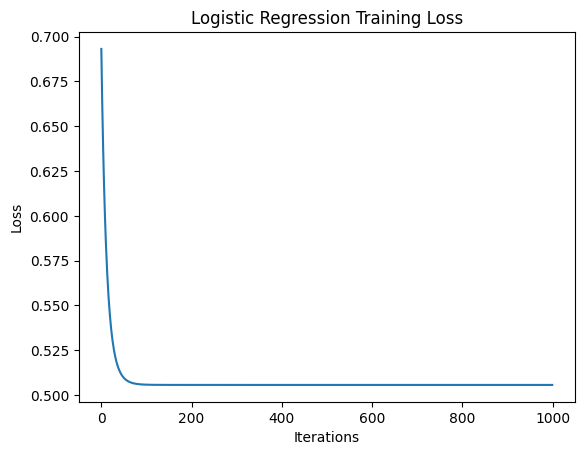

In [13]:
plt.figure()
plt.plot(model.losses)
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.title("Logistic Regression Training Loss")
plt.show()

Summary : To predict probabilities for binary classification I used sigmoid function in logistic regression. Gradient descent with Binary Cross Entropy loss is used to train the model. L2 regularization penalizes large weights to lessen overfitting, while feature standardization enhances convergence. The final accuracy shows good classification performance, and the training loss gradually decreases, indicating appropriate optimization.


## Question 3: K-Means Clustering from Scratch (Matrix Clustering)

You are given a **random matrix** `M` of shape `(n, m)`.

### Tasks
Implement K-Means clustering **from scratch** such that:

1. Input:
   - A random matrix `M`
   - Number of clusters `k`
2. Output:
   - `assignment_table`: a matrix of same shape as `M`, where each element stores the **cluster label**
   - `cookbook`: a dictionary (hashmap) where:
     - Key = cluster index
     - Value = list of **positions (i, j)** belonging to that cluster
   - `centroids`: array storing centroid values

You must cluster **individual elements**, not rows.


In [14]:
# Implement K-Means for matrix elements
#CAN USE SK-LEARN FOR THIS TASK AS THIS TASK WILL HELP US DIRECTLY IN OUR PROJECT !
def kmeans_matrix(M, k, max_iters=100):
    '''
    Returns:
    assignment_table: same shape as M, contains cluster labels
    cookbook: dict -> cluster_id : list of (i, j) positions
    centroids: numpy array of centroid values
    '''
    # Step 1: Flatten matrix values
    values = M.flatten()
    n_elements = values.shape[0]

    # Step 2: Initialize centroids randomly from values
    np.random.seed(42)
    centroids = np.random.choice(values, k, replace=False)

    for _ in range(max_iters):
        # Step 3: Assign clusters
        distances = np.abs(values[:, None] - centroids[None, :])
        labels = np.argmin(distances, axis=1)

        # Step 4: Update centroids
        new_centroids = np.array([
            values[labels == i].mean() if np.any(labels == i) else centroids[i]
            for i in range(k)
        ])

        # Step 5: Check convergence
        if np.allclose(centroids, new_centroids):
            break

        centroids = new_centroids

    # Step 6: Build assignment_table
    assignment_table = labels.reshape(M.shape)

    # Step 7: Build cookbook
    cookbook = {i: [] for i in range(k)}
    for i in range(M.shape[0]):
        for j in range(M.shape[1]):
            cluster_id = assignment_table[i, j]
            cookbook[cluster_id].append((i, j))

    return assignment_table, cookbook, centroids

In [15]:
# Creating a simple synthetic dataset
np.random.seed(0)
M = np.random.rand(4, 5)

assignment_table, cookbook, centroids = kmeans_matrix(M, k=3)

print("Matrix M:\n", M)
print("\nAssignment Table:\n", assignment_table)
print("\nCentroids:\n", centroids)
print("\nCookbook:")
for key, value in cookbook.items():
    print(f"Cluster {key}: {value}")

Matrix M:
 [[0.5488135  0.71518937 0.60276338 0.54488318 0.4236548 ]
 [0.64589411 0.43758721 0.891773   0.96366276 0.38344152]
 [0.79172504 0.52889492 0.56804456 0.92559664 0.07103606]
 [0.0871293  0.0202184  0.83261985 0.77815675 0.87001215]]

Assignment Table:
 [[0 1 0 0 0]
 [0 0 1 1 0]
 [1 0 0 1 2]
 [2 2 1 1 1]]

Centroids:
 [0.52044191 0.84609194 0.05946125]

Cookbook:
Cluster 0: [(0, 0), (0, 2), (0, 3), (0, 4), (1, 0), (1, 1), (1, 4), (2, 1), (2, 2)]
Cluster 1: [(0, 1), (1, 2), (1, 3), (2, 0), (2, 3), (3, 2), (3, 3), (3, 4)]
Cluster 2: [(2, 4), (3, 0), (3, 1)]


Summary : K-Means clustering was used to cluster individual matrix elements instead of rows. Based on absolute distance, each matrix entry was assigned to the closest centroid after being treated as a distinct data point. Centroid values were updated iteratively by the algorithm until convergence. The final product consists of the centroid values, a cookbook dictionary that lists the element positions for each cluster, and an assignment table that maps each matrix position to a cluster.


## Submission Guidelines
- Submit the completed `.ipynb` file.
- Clearly label all plots and outputs.
- Code readability and correctness matter.
- Partial credit will be given for logically correct implementations.

**Bonus**
- Compare convergence with and without standardization.
- Try different values of regularization strength.
